In [46]:
import pandas as pd
#Reading the file into a dataframe
PATH = r'C:\Users\Sumba\OneDrive\Desktop\AI LABS\diabetes_Modified.csv'
data = pd.read_csv(PATH)
#Displaying the read contents
data

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


In [47]:
X = data.drop("Outcome",axis=1) #predictors
Y = data["Outcome"] 

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X, Y,test_size=0.20,random_state=0)

Note: here the sigmoid function is defined within the logistic regression model so we don't have to define it on our own.

In [49]:
%%time
# Create logistic regression object
from sklearn.linear_model import LogisticRegression
logistic_regression1 = LogisticRegression(solver="liblinear", random_state=10)
# logistic_regression1 = LogisticRegression(solver="liblinear", random_state=10, penalty="l1")
# logistic_regression1 = LogisticRegression(solver="liblinear", random_state=10, penalty="l1",class_weight={0: 1, 1:50} )
# treat any mistake on Class 1 as 50 times worse than a mistake on Class 0.

# Train model
model1 = logistic_regression1.fit(X_train, Y_train)

CPU times: total: 0 ns
Wall time: 4.99 ms


In [50]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [51]:
Y_pred_train = model1.predict(X_train)

# Printing results
print(confusion_matrix(Y_train, Y_pred_train))
print("Accuracy: ",metrics.accuracy_score(Y_train,Y_pred_train))
print('Precision: ',metrics.precision_score(Y_train,Y_pred_train))
print('Recall score: ',metrics.recall_score(Y_train,Y_pred_train))
print('F1 score: ',metrics.f1_score(Y_train,Y_pred_train))

[[351  42]
 [ 99 122]]
Accuracy:  0.7703583061889251
Precision:  0.7439024390243902
Recall score:  0.5520361990950227
F1 score:  0.6337662337662338


Repeat 2 with 0.4 and 0.75 as threshold and complete the following table. Label these new
models as 2 and 3.

setting the threshold values as 0.4 and 0.75

In [52]:
%%time
# Create logistic regression object
from sklearn.linear_model import LogisticRegression
logistic_regression1 = LogisticRegression(solver="liblinear", random_state=10)
# logistic_regression1 = LogisticRegression(solver="liblinear", random_state=10, penalty="l1")
# logistic_regression1 = LogisticRegression(solver="liblinear", random_state=10, penalty="l1",class_weight={0: 1, 1:50} )
# treat any mistake on Class 1 as 50 times worse than a mistake on Class 0.

# Train model
model2 = logistic_regression1.fit(X_train, Y_train)

CPU times: total: 31.2 ms
Wall time: 4.62 ms


In [53]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Get predicted probabilities (class = 1 probability)
y_prob_train = model2.predict_proba(X_train)[:, 1]

# Set your custom threshold
threshold = 0.4

# Convert probability into class prediction (0 or 1)
Y_pred_train = (y_prob_train >= threshold).astype(int)

# Performance evaluation
print(confusion_matrix(Y_train, Y_pred_train))
print("Accuracy: ", accuracy_score(Y_train, Y_pred_train))
print("Precision: ", precision_score(Y_train, Y_pred_train))
print("Recall: ", recall_score(Y_train, Y_pred_train))
print("F1 score: ", f1_score(Y_train, Y_pred_train))


[[322  71]
 [ 64 157]]
Accuracy:  0.7801302931596091
Precision:  0.6885964912280702
Recall:  0.7104072398190046
F1 score:  0.6993318485523385


In [54]:
%%time
# Create logistic regression object
from sklearn.linear_model import LogisticRegression
logistic_regression1 = LogisticRegression(solver="liblinear", random_state=10)
# logistic_regression1 = LogisticRegression(solver="liblinear", random_state=10, penalty="l1")
# logistic_regression1 = LogisticRegression(solver="liblinear", random_state=10, penalty="l1",class_weight={0: 1, 1:50} )
# treat any mistake on Class 1 as 50 times worse than a mistake on Class 0.

# Train model
model3 = logistic_regression1.fit(X_train, Y_train)

CPU times: total: 0 ns
Wall time: 4.37 ms


In [55]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Get predicted probabilities (class = 1 probability)
y_prob_train = model3.predict_proba(X_train)[:, 1]

# Set your custom threshold
threshold = 0.75

# Convert probability into class prediction (0 or 1)
Y_pred_train = (y_prob_train >= threshold).astype(int)

# Performance evaluation
print(confusion_matrix(Y_train, Y_pred_train))
print("Accuracy: ", accuracy_score(Y_train, Y_pred_train))
print("Precision: ", precision_score(Y_train, Y_pred_train))
print("Recall: ", recall_score(Y_train, Y_pred_train))
print("F1 score: ", f1_score(Y_train, Y_pred_train))

[[387   6]
 [182  39]]
Accuracy:  0.6938110749185668
Precision:  0.8666666666666667
Recall:  0.17647058823529413
F1 score:  0.2932330827067669


observation: The value of recall has decreased as the the threshold values have been increased.

illustrating the results of the three models (m1,m2 and m3) through bar graphs.

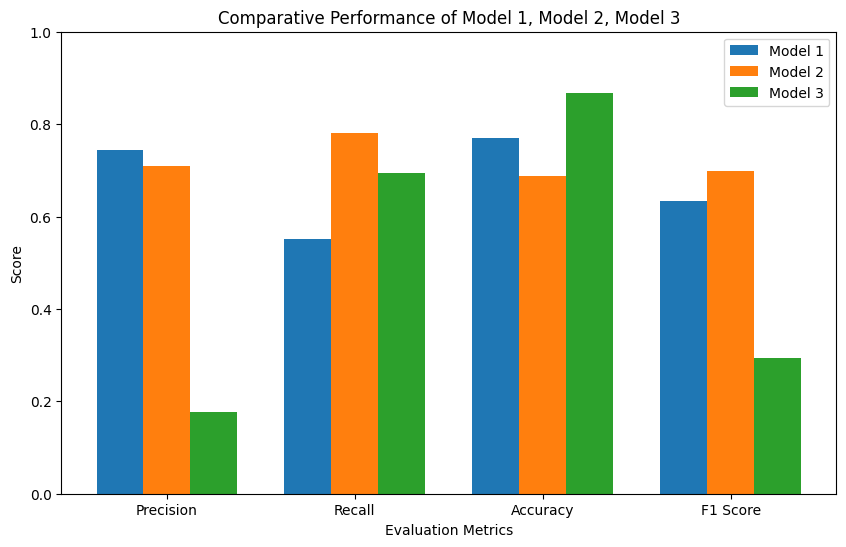

In [56]:
import matplotlib.pyplot as plt
import numpy as np

# Replace these with your model results
# Example values:
model1 = [0.7439024390243902, 0.5520361990950227, 0.7703583061889251, 0.6337662337662338]   # [Precision, Recall, Accuracy, F1 Score]
model2 = [0.7104072398190046, 0.7801302931596091, 0.6885964912280702, 0.6993318485523385]
model3 = [0.17647058823529413, 0.6938110749185668, 0.8666666666666667, 0.2932330827067669]

metrics = ["Precision", "Recall", "Accuracy", "F1 Score"]

# Bar chart setup
x = np.arange(len(metrics))  # positions for metrics
width = 0.25                 # width of the bars

plt.figure(figsize=(10,6))

plt.bar(x - width, model1, width, label='Model 1')
plt.bar(x, model2, width, label='Model 2')
plt.bar(x + width, model3, width, label='Model 3')

plt.xlabel("Evaluation Metrics")
plt.ylabel("Score")
plt.title("Comparative Performance of Model 1, Model 2, Model 3")
plt.xticks(x, metrics)
plt.legend()
plt.ylim(0, 1)   # because scores range between 0 and 1

plt.show()
